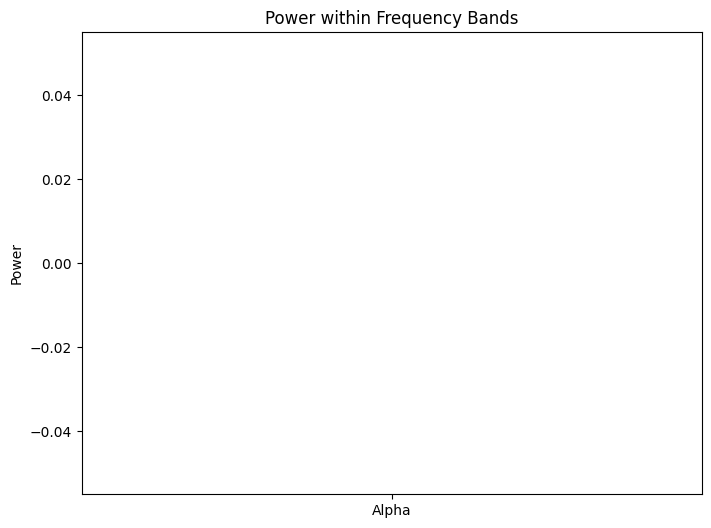

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Load your EEG dataset from a CSV file on desktop
eeg_data = np.genfromtxt(r'C:\\Users\\BASAVA\\Desktop\\AIML PROJECT\\StressPrediction\\StressPrediction\\correlation_test.csv', delimiter=',')

# Extract the EEG signal from the loaded data
eeg_signal = eeg_data[:, 1]  # Assuming EEG signal is in the second column, adjust if needed

# Sample rate and time vector
fs = 1000  # Sample rate
t = np.arange(len(eeg_signal)) / fs  # Time vector

# Compute the power spectral density
frequencies, psd = signal.welch(eeg_signal, fs, nperseg=1024)

# Define frequency bands (in Hz)
alpha_band = (8, 12)
beta_band = (13, 30)
gamma_band = (30, 80)
theta_band = (4, 7)

# Find indices corresponding to the frequency bands
alpha_idx = np.where((frequencies >= alpha_band[0]) & (frequencies <= alpha_band[1]))[0]
beta_idx = np.where((frequencies >= beta_band[0]) & (frequencies <= beta_band[1]))[0]
gamma_idx = np.where((frequencies >= gamma_band[0]) & (frequencies <= gamma_band[1]))[0]
theta_idx = np.where((frequencies >= theta_band[0]) & (frequencies <= theta_band[1]))[0]

# Extract power within each frequency band
alpha_power = np.mean(psd[alpha_idx])
beta_power = np.mean(psd[beta_idx])
gamma_power = np.mean(psd[gamma_idx])
theta_power = np.mean(psd[theta_idx])

# Plot the power within each frequency band
plt.figure(figsize=(8, 6))
plt.bar(['Alpha', 'Beta', 'Gamma', 'Theta'], [alpha_power, beta_power, gamma_power, theta_power], color=['blue', 'green', 'red', 'purple'])
plt.ylabel('Power')
plt.title('Power within Frequency Bands')
plt.show()